    Focus on 'Portugal' and 'Vinho Verde' region.

check for duplicates

    Remove Price outliers (hint: Take prices between (Q1-1.5(IQR) and Q3+1.5(IQR)).

Cut ratings or prices into 3 levels (or n levels depending on how many quality labels you have). For each level, check the price range (min_price, max_price) and mean_price/median_price.

Lastly, try to estimate the price of wines in your original dataset and provide suggestions on the price per quality label.

You do not need a Machine Learning algorithm to complete this part of the project. Also, this part of the project is not mandatory.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [18]:
wine_price = pd.read_csv('wine_sales_data.csv')
wine_price.info()
wine_price.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


## Portugal - Vinho Verde

In [19]:
wine_price['province'].unique()

vinho_verde=wine_price['province']=='Vinho Verde'
wine_vv=wine_price[vinho_verde]
wine_vv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 277 to 143575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   396 non-null    int64  
 1   country      396 non-null    object 
 2   description  396 non-null    object 
 3   designation  301 non-null    object 
 4   points       396 non-null    int64  
 5   price        310 non-null    float64
 6   province     396 non-null    object 
 7   region_1     0 non-null      object 
 8   region_2     0 non-null      object 
 9   variety      396 non-null    object 
 10  winery       396 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ KB


In [20]:
wine_vv.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo


<Axes: xlabel='points', ylabel='price'>

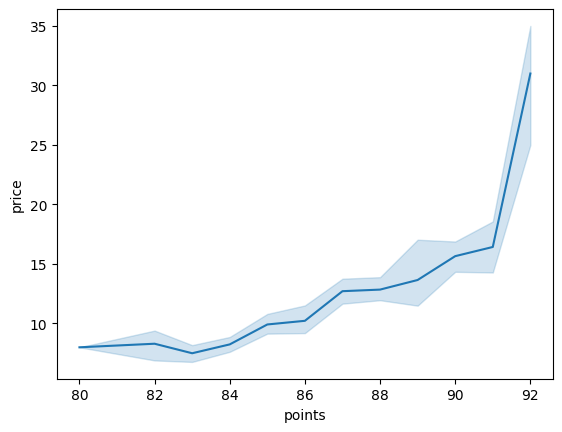

In [21]:
sns.lineplot(x='points',y='price' , data=wine_vv)

<Axes: xlabel='points', ylabel='price'>

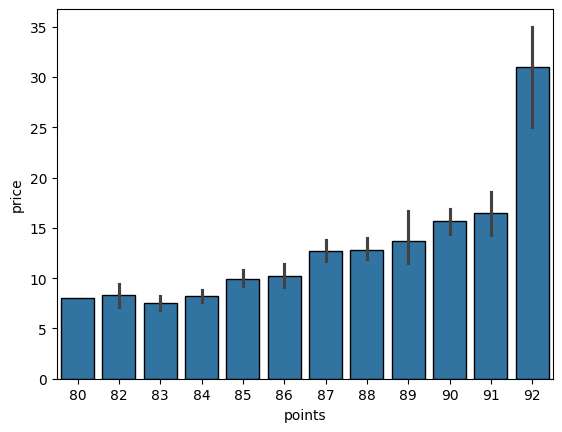

In [22]:
sns.barplot(x='points',y='price' , data=wine_vv,  edgecolor='black')

<Axes: xlabel='points', ylabel='price'>

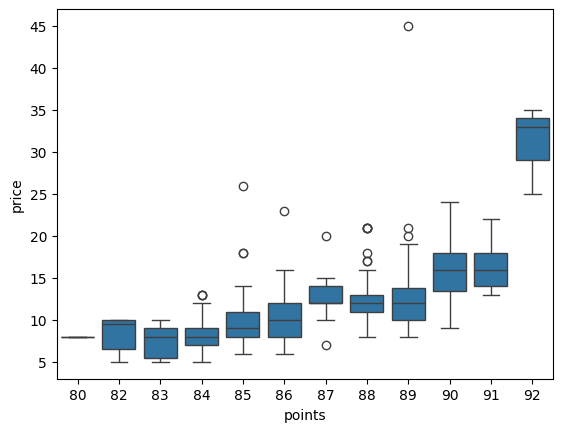

In [23]:
sns.boxplot(x='points',y='price' , data=wine_vv )

In [45]:
wine_q=wine_vv.copy()
wine_q['quality']= wine_vv['points'].apply(lambda value: 'low'
if value <= 86 else 'medium'
if value <= 89 else 'high')

<Axes: xlabel='quality', ylabel='price'>

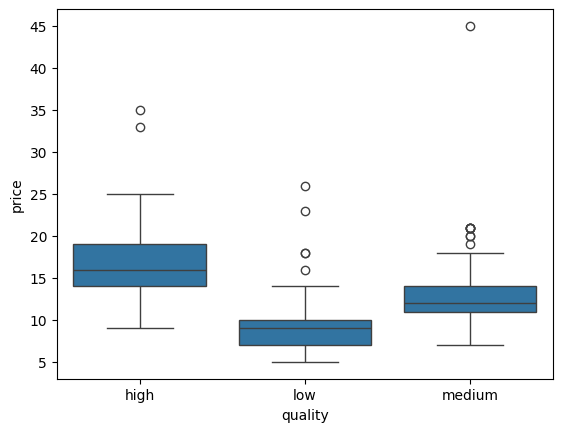

In [46]:
sns.boxplot(x='quality',y='price' , data=wine_q)

In [47]:
wine_q['quality'].value_counts(normalize=True)

quality
low       0.558081
medium    0.280303
high      0.161616
Name: proportion, dtype: float64

In [61]:
from pandas.api.types import is_numeric_dtype

def remove_outliers(df):
   for col in df:
        if is_numeric_dtype(df[col]):
            Q1=df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df[col]=np.where(df[col]> (Q3 + 1.5 * IQR), (Q3 + 1.5 * IQR),np.where(df[col]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),df[col]))
        else:
            continue
        
remove_outliers(wine_q)

In [66]:
low=wine_q[wine_q['quality']=='low']
medium=wine_q[wine_q['quality']=='medium']
high=wine_q[wine_q['quality']=='high']



low.describe() # mean price 9
medium.describe() # mean price 13
high.describe() # mean price 16
 



,Unnamed: 0,points,price
count,64.00000,64.000000,45.000000
mean,77907.78125,90.281250,15.955556
std,44451.07013,0.548266,3.452309
min,277.00000,90.000000,9.000000
25%,38499.75000,90.000000,14.000000
50%,75533.50000,90.000000,16.000000
75%,114887.00000,90.000000,19.000000
max,137442.00000,92.000000,20.500000
